In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import metrics # analisa a acurácia de nossos modelos

# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importando nossa base de dados
from sklearn.datasets import load_breast_cancer

#importando a base de dados nativas no sklearn
dados=load_breast_cancer()

# Carregando base de dados
# vamos ver a descrição de nossa base de dados
print(dados.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
dados.items()

dict_items([('data', array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])), ('target', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
# Transformando a base de dados em um DataFrame
# convertendo para dataframe com ajuda do Pandas
cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names)
# Adicionando a nossa Target
cancer['Class']=dados.target

In [ ]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer.shape

(569, 31)

In [ ]:
# Distribuição de nossas classes
cancer['Class'].value_counts() # 1- Benigno 0 = Máligno

,count
Class,
1,357
0,212


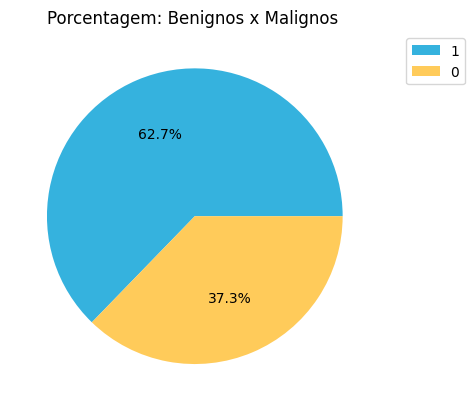

In [ ]:
colors=['#35b2de','#ffcb5a'] # Apenas escolhando as cores
labels=cancer['Class'].value_counts().index
plt.pie(cancer['Class'].value_counts(),autopct='%1.1f%%',colors=colors) # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(labels,bbox_to_anchor=(1.25,1),) # Nossas Legendas
plt.title('Porcentagem: Benignos x Malignos ')
plt.show()

In [ ]:
# Misssing Values
cancer.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
#Vamos criar nossas amostras para a construção dos modelos
#Vamos usar mais uma vez a biblioteca sklearn
from sklearn.model_selection import train_test_split

#Primeiro vamos dividir nossa base de dados entre features e target
X = cancer.iloc[:,0:-1] #Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y = cancer.iloc[:,-1] #Selecionando todas as linhas da última coluna ['Class'].

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
# test-size: neste casos vamos dividir nosso dataset em 70% treino e 30% teste
# random_state: vamos selecionar de forma aleatória

In [ ]:
print('X treino', x_train.shape) #70% = 398
print('X test', x_test.shape) #30% = 171
print('Y treino', y_train.shape) #(398, 1) = última coluna
print('Y test', y_test.shape) #(171, 1) = última coluna

X treino (398, 30)
X test (171, 30)
Y treino (398,)
Y test (171,)


**Modelos de Classificação:**

*Regressão Logística:*

In [ ]:
# importando nosso modelo
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # Criando o modelo
logreg.fit(x_train, y_train) # Treinando o modelo
y_pred = logreg.predict(x_test) # predizendo
acc_logreg = round(metrics.accuracy_score(y_pred, y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print("{}% de acurácia".format(acc_logreg,))

97.1% de acurácia


*Support Vector Machines (SVM):*

In [ ]:
# importando nosso modelo
from sklearn.svm import SVC

svc = SVC() # Criando o modelo
svc.fit(x_train, y_train) # Treinando o modelo
y_pred = svc.predict(x_test) # predizendo
acc_svc = round(metrics.accuracy_score(y_pred, y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_svc,"% de acurácia")

93.6 % de acurácia


*Gaussian Naive Bayes:*

In [ ]:
# importando nosso modelo
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() # Criando o modelo
gaussian.fit(x_train, y_train) # Treinando o modelo
y_pred = gaussian.predict(x_test) # predizendo
acc_gaussian = round(metrics.accuracy_score(y_pred, y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian,"% de acurácia")

94.2 % de acurácia


*Arvore de Decisão:*

In [ ]:
# importando nosso modelo
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() # Criando o modelo
tree.fit(x_train, y_train) # Treinando o modelo
y_pred = tree.predict(x_test) # predizendo
acc_tree = round(metrics.accuracy_score(y_pred, y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_tree,"% de acurácia")

92.4 % de acurácia


*Random Forest:*

In [ ]:
# importando nosso modelo
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100) # Criando o modelo
forest.fit(x_train, y_train) # Treinando o modelo
y_pred = forest.predict(x_test) # predizendo
acc_forest = round(metrics.accuracy_score(y_pred, y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_forest,"% de acurácia")

97.1 % de acurácia


*KNN:*

In [ ]:
# importando nosso modelo
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) # Criando o nosso classificador
knn.fit(x_train, y_train) # Treinando o modelo
y_pred = knn.predict(x_test) # Predizendo nossos dados de testet
acc_knn = round(metrics.accuracy_score(y_pred, y_test)*100,1)
print(acc_knn,"% de acurácia") # Exibindo resultado

93.6 % de acurácia


In [ ]:
modelos=pd.DataFrame({'Modelos':['Regressão Logística',
'Support Vector Machine',\
'Gaussian Naive Bayes'
,'Árvore de Decisão'
,\
'Random Forest','KNN'],\
'Score':[acc_logreg,acc_svc,acc_gaussian,acc_tree,acc_forest,acc_knn]})
modelos.sort_values(by="Score", ascending=False)

,Modelos,Score
0,Regressão Logística,97.1
4,Random Forest,97.1
2,Gaussian Naive Bayes,94.2
1,Support Vector Machine,93.6
5,KNN,93.6
3,Árvore de Decisão,92.4
